In [367]:
### Importing the Libraries
# Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
pd.set_option('display.max_rows', None, 'display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")

# Data Importing and check
check missing values, distribution, renaming of columns, categorywise distribution, displot, barplot, boxplot

In [368]:
rdf=pd.read_csv("train.csv")
print(rdf.shape)
rdf.head(10)

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

# Data Understanding and Data Exploration

In [369]:
rdf.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [370]:
rdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [371]:
#Checking the columns which has all the NULL value across the given dataset
test = rdf.dropna(how='all', axis=1) 
test.shape

(1460, 81)

In [372]:
#Checking for Duplicates if any
test=rdf.drop_duplicates()
test.shape

(1460, 81)

In [373]:
# Create a function to check Missing Values
def missing_zero_values_percentage(df):
    zero_val_percent = round(((100* (df == 0.00).astype(int).sum(axis=0))/len(df)),2)
    mis_val_percent = round((100 * df.isnull().sum() / len(df)),2)
    missing_value_percent_table = pd.concat([zero_val_percent,mis_val_percent], axis=1)
    missing_value_percent_table = missing_value_percent_table.rename(
        columns = {0 : '% of Zero Values', 1 : '% of NULL Values'})
    missing_value_percent_table['Total % of Missing Values'] = missing_value_percent_table['% of Zero Values'] + missing_value_percent_table['% of NULL Values']
    return missing_value_percent_table.sort_values(by='Total % of Missing Values', ascending=False)

In [374]:
# Check the columns that have most NULL or 0 values 
missing_parcentage = missing_zero_values_percentage(rdf)
missing_parcentage.head(20)

,% of Zero Values,% of NULL Values,Total % of Missing Values
PoolQC,0.00,99.52,99.52
PoolArea,99.52,0.00,99.52
3SsnPorch,98.36,0.00,98.36
LowQualFinSF,98.22,0.00,98.22
MiscVal,96.44,0.00,96.44
MiscFeature,0.00,96.30,96.30
BsmtHalfBath,94.38,0.00,94.38
Alley,0.00,93.77,93.77
ScreenPorch,92.05,0.00,92.05
BsmtFinSF2,88.56,0.00,88.56


In [375]:
# Check the distinct values count of Nominal categorical columns
nom_cat_col=['MSSubClass','MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition1','Condition2','BldgType','HouseStyle','OverallQual','OverallCond','RoofStyle','RoofMatl','Exterior1st',
        'Exterior2nd','MasVnrType','Foundation','Heating','CentralAir','Electrical','Functional','GarageType','GarageFinish',
         'PavedDrive','MiscFeature','SaleType','SaleCondition','Fence','MoSold']
for i in nom_cat_col:
    cnt=rdf.value_counts(subset=i, dropna=False)
    pct=round(rdf.value_counts(subset=i, dropna=False)/rdf.shape[0],2)*100
    print(pd.concat([cnt, pct], axis=1) )
    print('-------------------------')


              0     1
MSSubClass           
20          536  37.0
60          299  20.0
50          144  10.0
120          87   6.0
30           69   5.0
160          63   4.0
70           60   4.0
80           58   4.0
90           52   4.0
190          30   2.0
85           20   1.0
75           16   1.0
45           12   1.0
180          10   1.0
40            4   0.0
-------------------------
             0     1
MSZoning            
RL        1151  79.0
RM         218  15.0
FV          65   4.0
RH          16   1.0
C (all)     10   1.0
-------------------------
           0      1
Street             
Pave    1454  100.0
Grvl       6    0.0
-------------------------
          0     1
Alley            
NaN    1369  94.0
Grvl     50   3.0
Pave     41   3.0
-------------------------
            0     1
LotShape           
Reg       925  63.0
IR1       484  33.0
IR2        41   3.0
IR3        10   1.0
-------------------------
                0     1
LandContour            
Lvl        

In [376]:
# ordered categorical columns based on data dictionary
ord_cat_col=['ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC',
             'KitchenQual','FireplaceQu','GarageQual','GarageCond','PoolQC']
for i in ord_cat_col:
    cnt=rdf.value_counts(subset=i, dropna=False)
    pct=round(rdf.value_counts(subset=i, dropna=False)/rdf.shape[0],2)*100
    print(pd.concat([cnt, pct], axis=1) )
    print('-------------------------')

             0     1
ExterQual           
TA         906  62.0
Gd         488  33.0
Ex          52   4.0
Fa          14   1.0
-------------------------
              0     1
ExterCond            
TA         1282  88.0
Gd          146  10.0
Fa           28   2.0
Ex            3   0.0
Po            1   0.0
-------------------------
            0     1
BsmtQual           
TA        649  44.0
Gd        618  42.0
Ex        121   8.0
NaN        37   3.0
Fa         35   2.0
-------------------------
             0     1
BsmtCond            
TA        1311  90.0
Gd          65   4.0
Fa          45   3.0
NaN         37   3.0
Po           2   0.0
-------------------------
                0     1
BsmtExposure           
No            953  65.0
Av            221  15.0
Gd            134   9.0
Mn            114   8.0
NaN            38   3.0
-------------------------
                0     1
BsmtFinType1           
Unf           430  29.0
GLQ           418  29.0
ALQ           220  15.0
BLQ           1

In [377]:
# # Visualize the Categorical Variables in BoxPlot
# cat_col=ord_cat_col+nom_cat_col
# # ln=len(cat_col)
# plt.figure(figsize=(20, 12))
# for i in cat_col:
#     plt.subplot(16,3,cat_col.index(i)+1)
#     sns.boxplot(x = i, y = 'SalePrice', data = rdf)

# plt.show()

In [378]:
# # Pairwise scatter plot with dependent variables vs independent variables 
# var=list(rdf)
# var.remove('SalePrice')
# plt.figure(figsize=(500, 100))
# #sns.set(rc={'figure.figsize':(20,10)})
# g=sns.pairplot(x_vars=var, y_vars='SalePrice', data=rdf)

# plt.show()

# # This is hard to read (need to zoom in), however this shows us there 7 categorical variables which are of numeric datatype
# ## season, weathersit, yr, mnth, holiday, weekday, workingday

In [379]:
# Create a list of numeric columns 
num_cols=[]
for i in rdf.columns:
    if rdf[i].dtype in('float64','float32','int64', 'int32', 'int', 'float'):
        num_cols.append(i)
num_cols.remove('MSSubClass')
print(num_cols)

['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


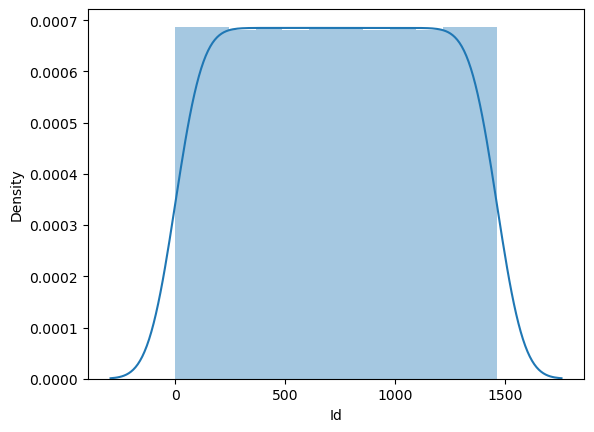

Id


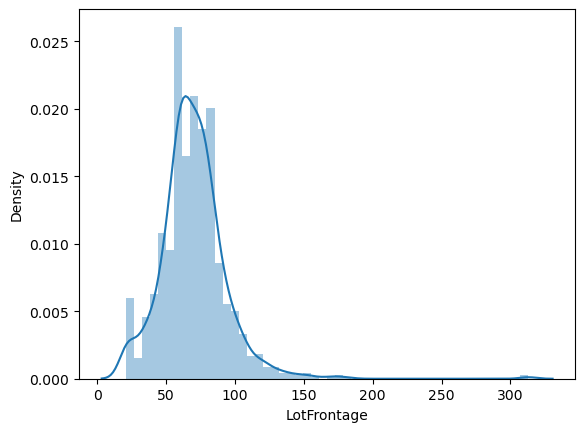

LotFrontage


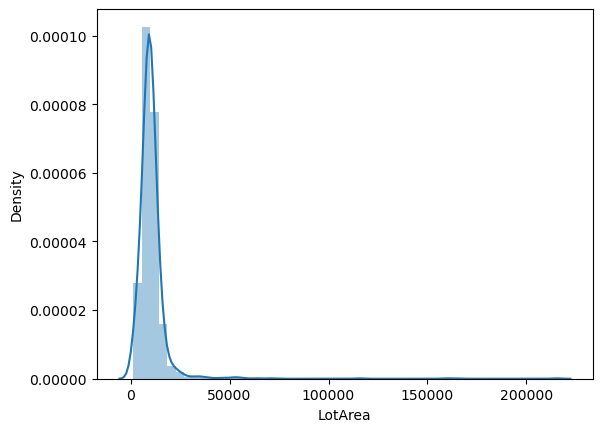

LotArea


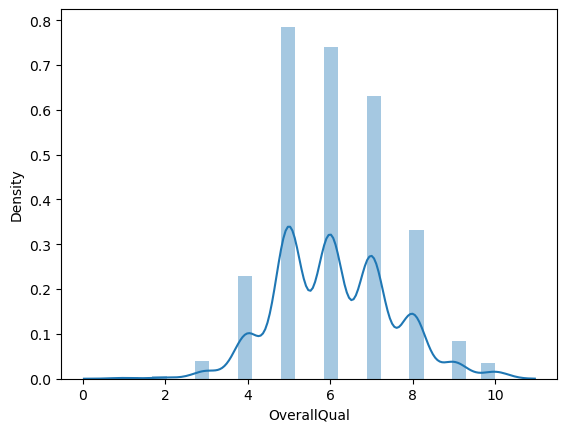

OverallQual


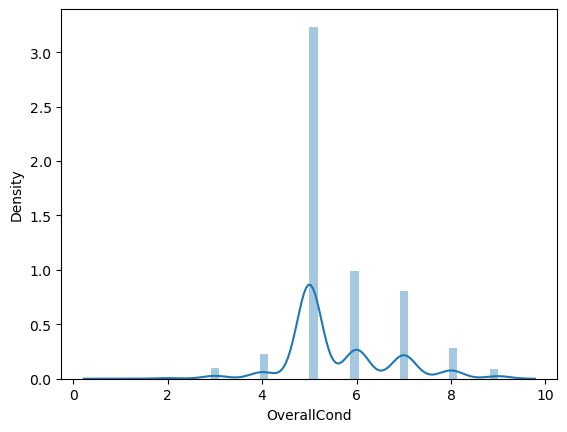

OverallCond


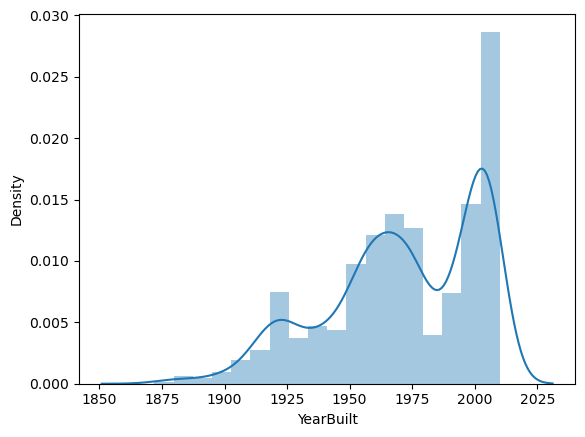

YearBuilt


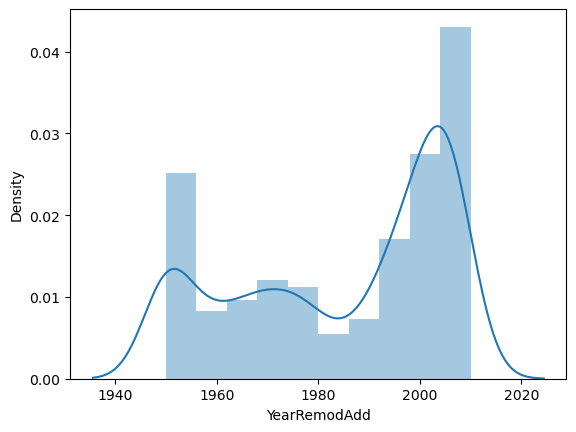

YearRemodAdd


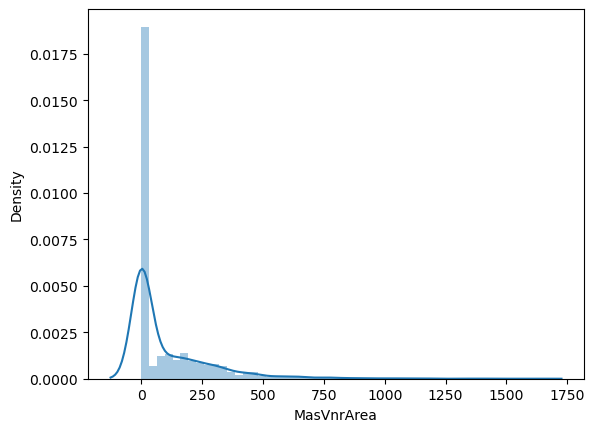

MasVnrArea


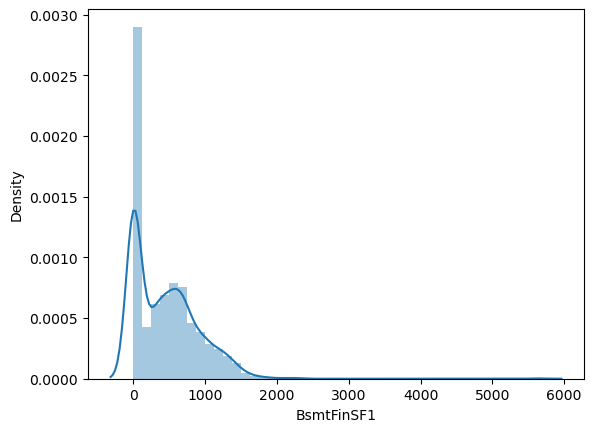

BsmtFinSF1


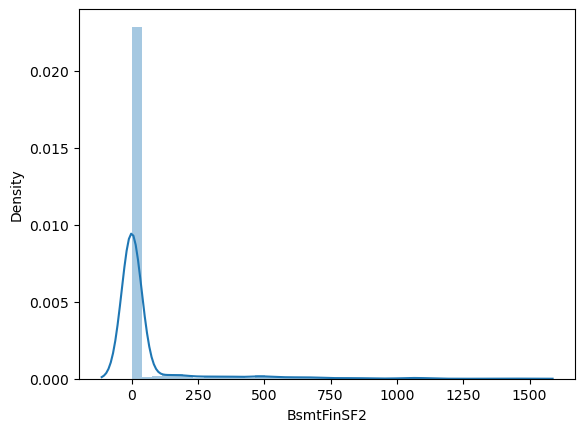

BsmtFinSF2


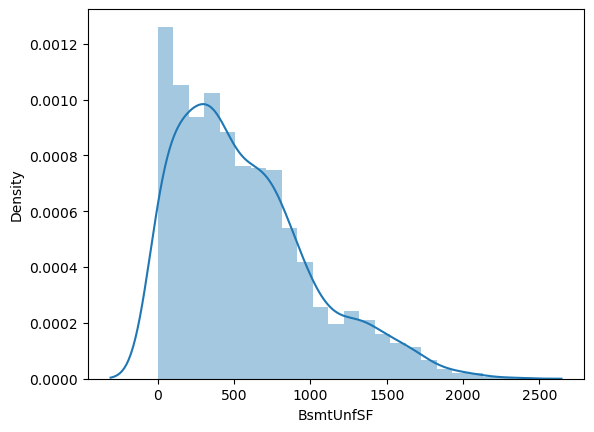

BsmtUnfSF


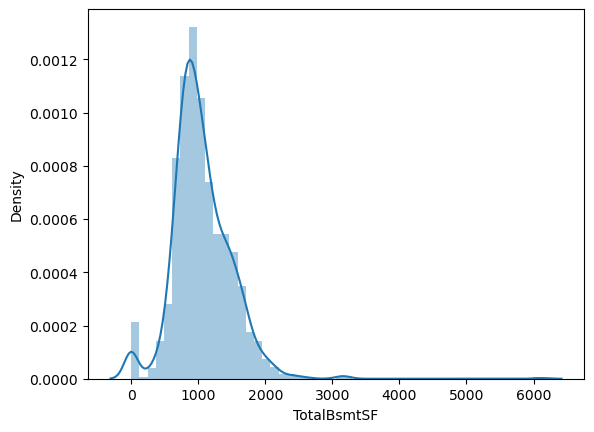

TotalBsmtSF


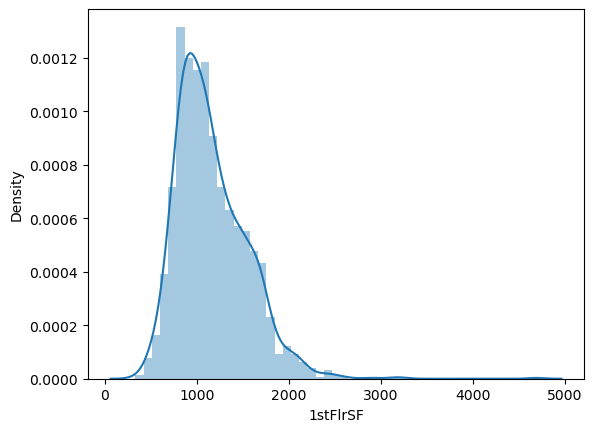

1stFlrSF


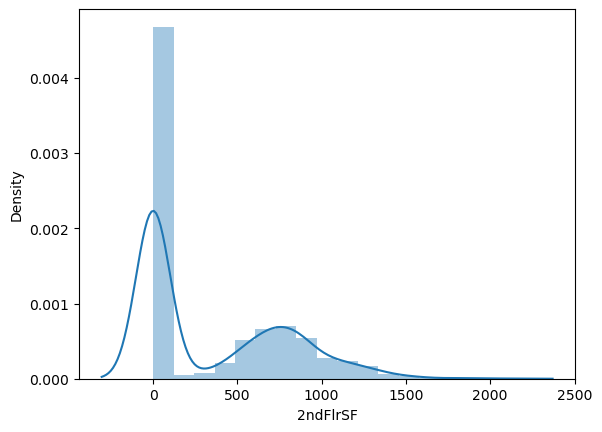

2ndFlrSF


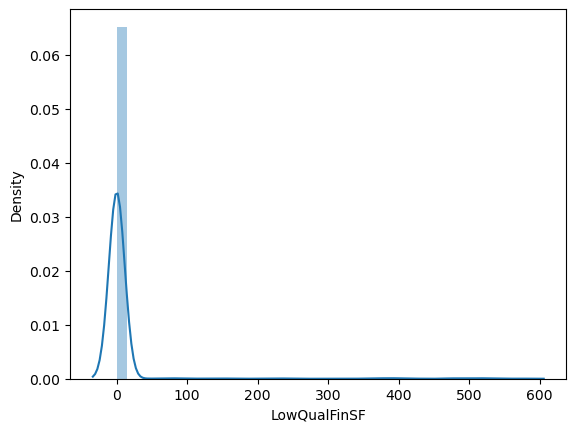

LowQualFinSF


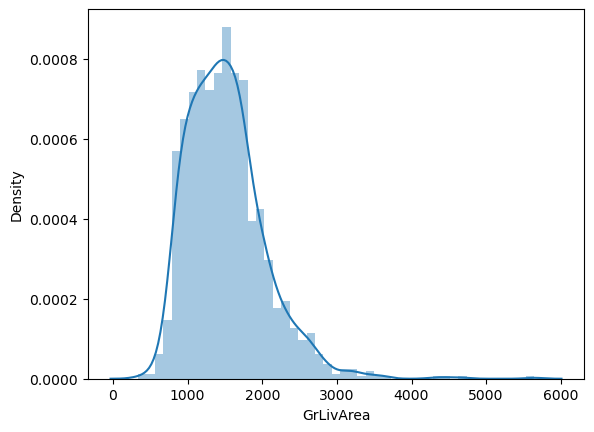

GrLivArea


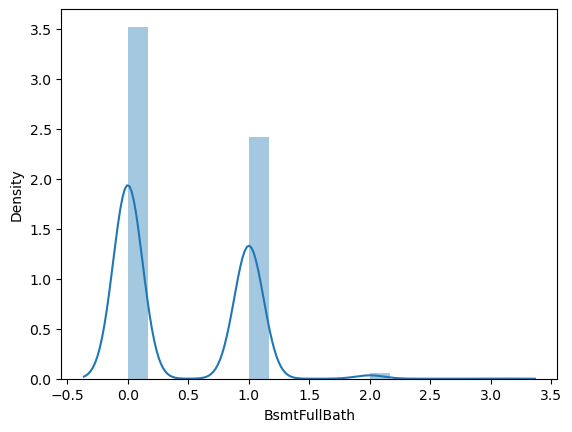

BsmtFullBath


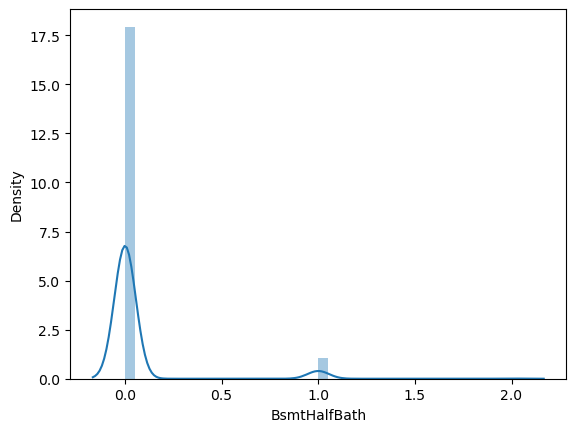

BsmtHalfBath


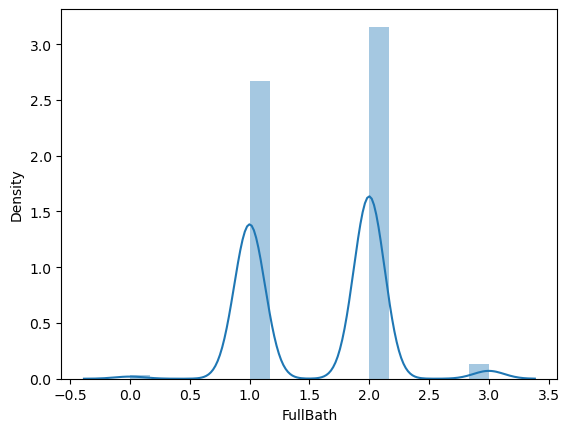

FullBath


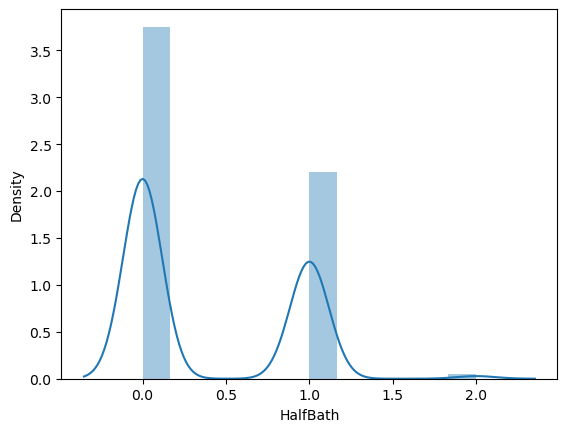

HalfBath


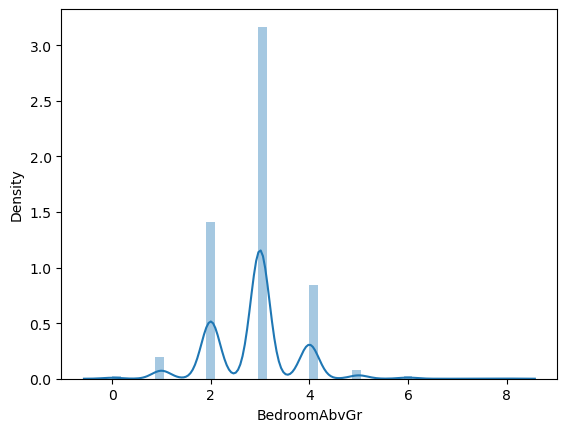

BedroomAbvGr


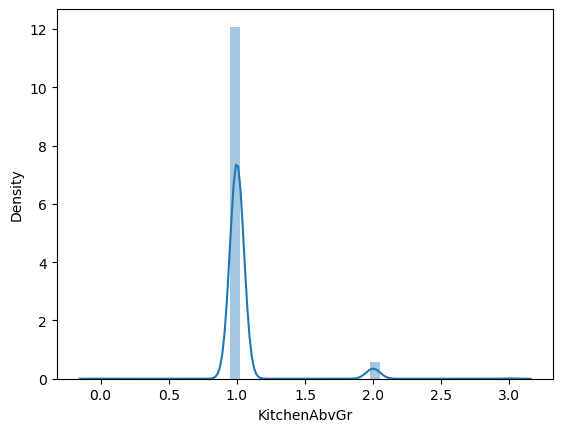

KitchenAbvGr


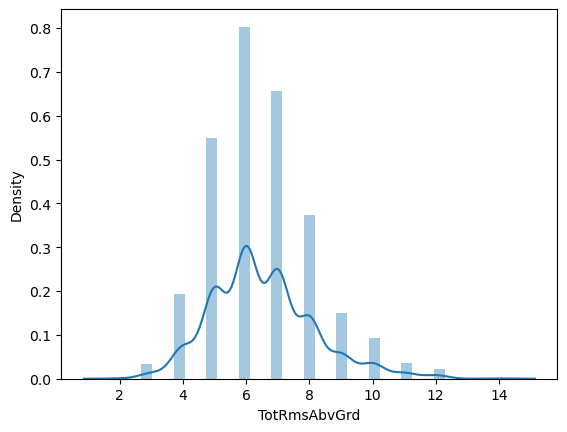

TotRmsAbvGrd


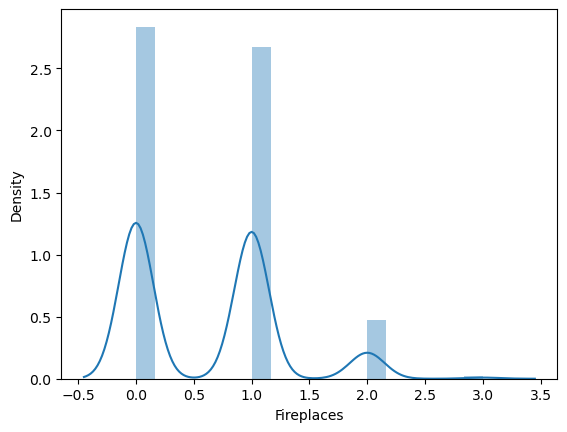

Fireplaces


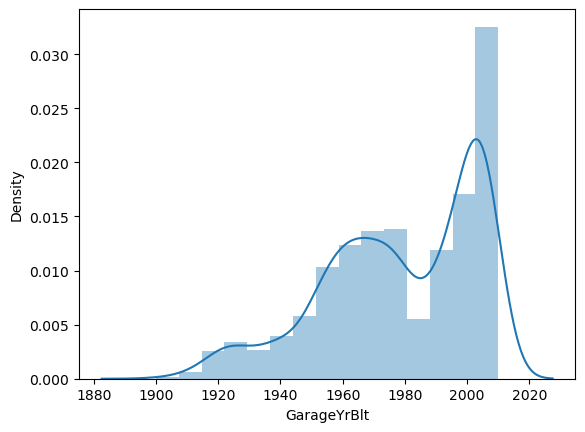

GarageYrBlt


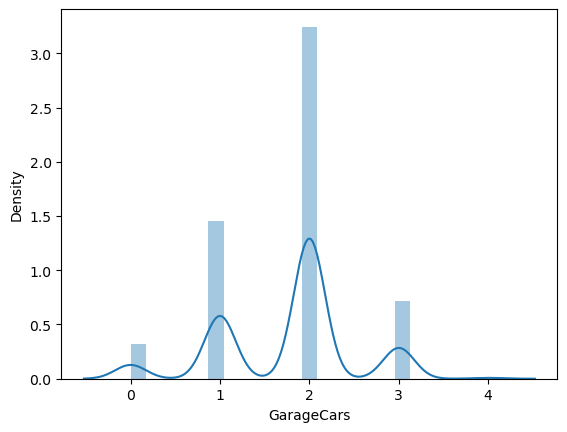

GarageCars


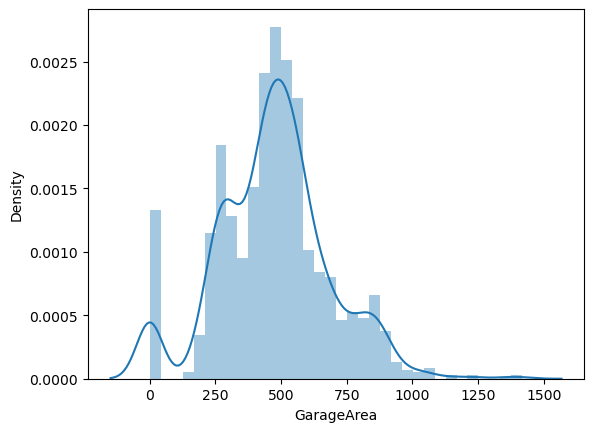

GarageArea


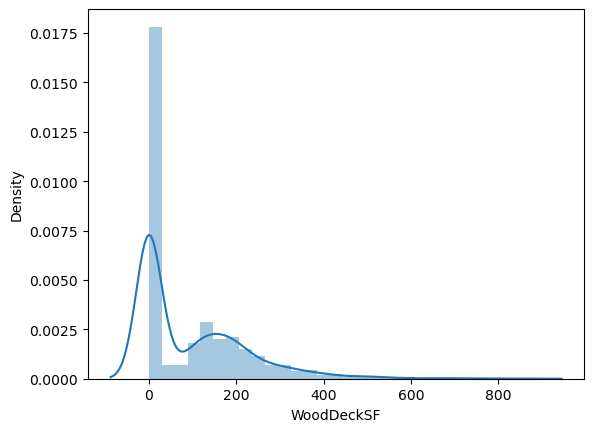

WoodDeckSF


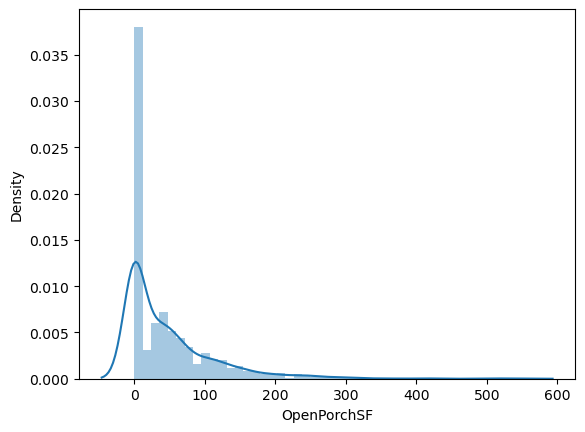

OpenPorchSF


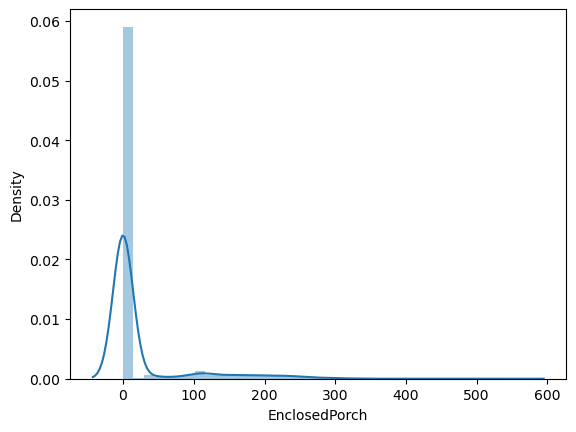

EnclosedPorch


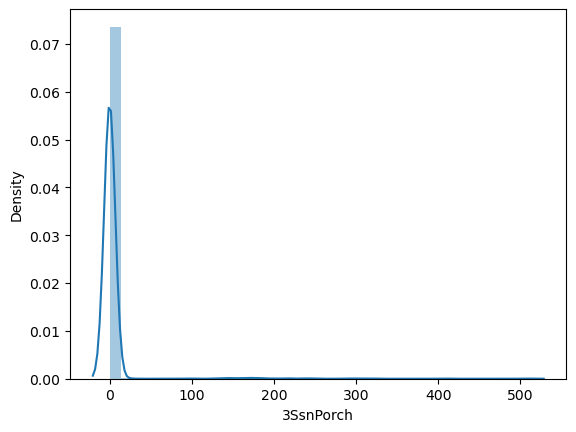

3SsnPorch


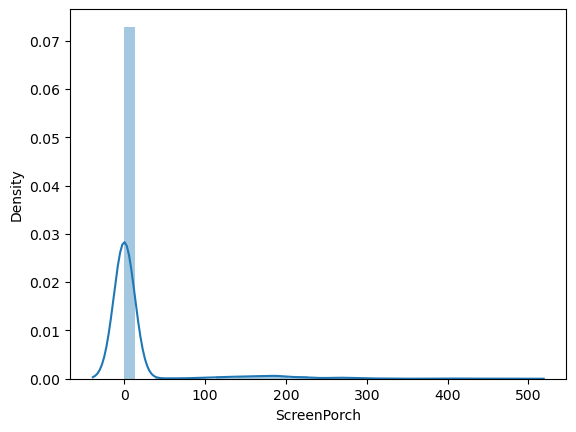

ScreenPorch


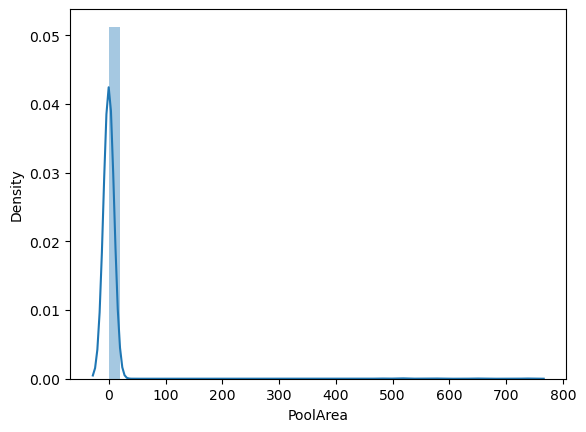

PoolArea


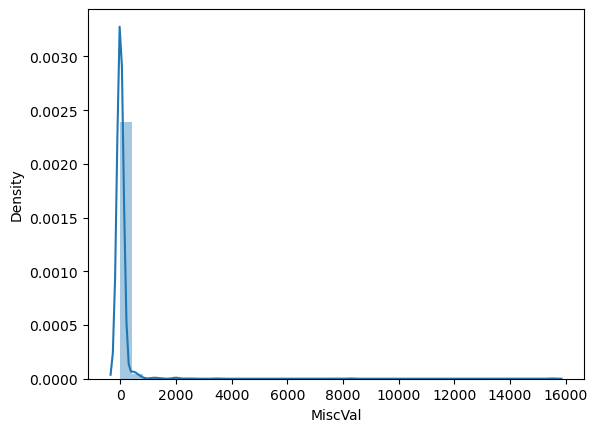

MiscVal


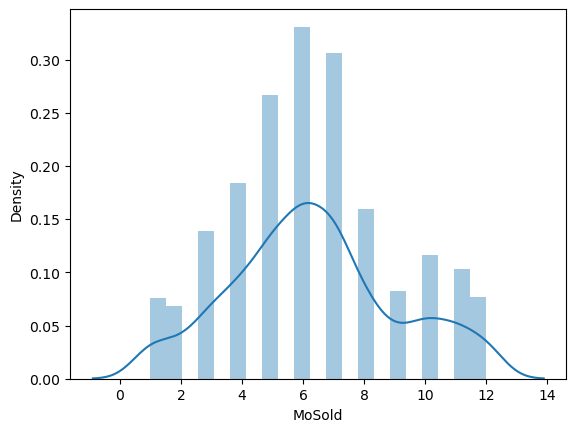

MoSold


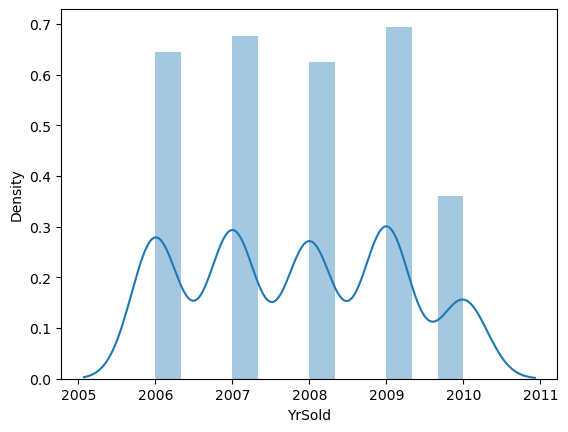

YrSold


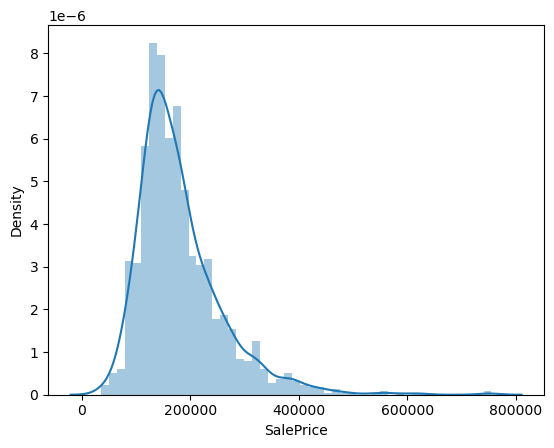

SalePrice


In [380]:
### Create displot for all numeric columns
for i in num_cols:
    sns.distplot(rdf[pd.notna(rdf[i])][i])
    plt.show(all)
    print(i)     

#### Observation From Data Exploration

#### No columns have all NULL values
#### No Duplicate values

##### The following columns are irrelavant:
Id

##### The following columns have mostly missing values, should be dropped: 
PoolQC, PoolArea, 3SsnPorch, LowQualFinSF, MiscVal, MiscFeature 

##### The following category columns are dominating (one value is > 90), should be dropped: 
nominal: Alley, Street, LandContour, Utilities, LandSlope, Condition2, RoofMatl, Heating, CentralAir, Electrical, Functional, PavedDrive 
ordinal: BsmtCond, GarageQual, GarageCond

##### The following category columns, values need to be modified/imputed:
MasVnrType, GarageFinish, Fence 

##### Year Columns to be transformed to AGE 
YearBuilt,YearRemodAdd,GarageYrBlt, MoSold, YrSold

# Data Cleaning

Drop irrelavant columns
Remove dominating category columns- one category takes up 90%
Assign new category value based on % of missing values

In [381]:
# creating another df for data cleaning
cdf=pd.DataFrame(data=rdf)
cdf.shape
# rdf.shape

(1460, 81)

In [382]:
# Droping the irrelavant columns as per understanding of the Data Dictionary & Business objective
drop_list=[] # creating a drop list to keep track of dropped columns
drop_list.append(['Id'])
cdf.drop(axis=1, columns=['Id'], inplace=True)
cdf.shape

(1460, 80)

In [383]:
# dropping 6 columns have most missing values: 
cdf.drop(axis=1, columns=['PoolQC', 'PoolArea', '3SsnPorch', 'LowQualFinSF', 'MiscVal', 'MiscFeature'], inplace=True)
drop_list.append(['PoolQC', 'PoolArea', '3SsnPorch', 'LowQualFinSF', 'MiscVal', 'MiscFeature'])
cdf.shape

(1460, 74)

In [384]:
# dropping 15 dominating category columns- one category takes up 90%
cdf.drop(axis=1, columns=['Alley','Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'Heating', 
                          'CentralAir', 'Electrical', 'Functional', 'PavedDrive', 'BsmtCond','GarageQual','GarageCond'], 
         inplace=True)
drop_list.append(['Alley','Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'Heating', 
                          'CentralAir', 'Electrical', 'Functional', 'PavedDrive', 'BsmtCond','GarageQual','GarageCond'])
cdf.shape

(1460, 59)

In [385]:
# Fill the missing values with appropriate values
cdf['MasVnrType']=cdf['MasVnrType'].fillna('None')
cdf['GarageFinish']=cdf['GarageFinish'].fillna('No_Garage')
cdf['Fence']=cdf['Fence'].fillna('No_Fence')

In [386]:
# Cat columns with missing values 
missing_cat_cols = ['FireplaceQu','GarageType','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtQual']
cdf[missing_cat_cols] = cdf[missing_cat_cols].fillna("None")

# MasVnrArea:
cdf['MasVnrArea'] = cdf['MasVnrArea'].fillna(0)

# GarageYrBlt:
cdf['GarageYrBlt'] = cdf['GarageYrBlt'].fillna(cdf.YearBuilt)

# LotFrontage:
cdf['LotFrontage'] = cdf['LotFrontage'].fillna(cdf['LotFrontage'].mean())

# Feature Engineering
##### Process ordinal categorical 
##### Change/modify date/year columns appropriately
##### Create derived columns
##### Change column Names as required
##### Create dummy variables

In [387]:
fdf=pd.DataFrame(data=cdf)
fdf.shape

(1460, 59)

In [388]:
# Changing Values of Ordinal Categorical variables.
# ExterQual,ExterCond,BsmtQual,BsmtExposure,HeatingQC,KitchenQual,FireplaceQu
fdf['ExterQual'].replace(('Ex','Gd','TA','Fa','Po'),(5,4,3,2,1),inplace=True)
fdf['ExterCond'].replace(('Ex','Gd','TA','Fa','Po'),(5,4,3,2,1),inplace=True)
fdf['BsmtQual'].replace(('Ex','Gd','TA','Fa','Po','none'),(5,4,3,2,1,0),inplace=True)
fdf['BsmtExposure'].replace(('Gd','Av','Mn','No','none'),(4,3,2,1,0),inplace=True)
fdf['BsmtFinType1'].replace(('GLQ','ALQ','BLQ','Rec','LwQ','Unf','NA'),(6,5,4,3,2,1,0),inplace=True)
fdf['BsmtFinType2'].replace(('GLQ','ALQ','BLQ','Rec','LwQ','Unf','NA'),(6,5,4,3,2,1,0),inplace=True)
fdf['HeatingQC'].replace(('Ex','Gd','TA','Fa','Po'),(5,4,3,2,1),inplace=True)
fdf['KitchenQual'].replace(('Ex','Gd','TA','Fa','Po'),(5,4,3,2,1),inplace=True)
fdf['FireplaceQu'].replace(('Ex','Gd','TA','Fa','Po','None'),(5,4,3,2,1,0),inplace=True)

In [389]:
# Create Derived columns
fdf['HouseAgeAtSold'] = fdf['YrSold'] - fdf['YearBuilt'] #Age of the house when Sold
fdf['GarageAgeAtSold'] = fdf['YrSold'] - fdf['GarageYrBlt'] #Age of the garage when Sold
fdf['Is_ReModeled'] = np.where(fdf['YearRemodAdd'] == fdf['YearBuilt'], 0, 1) # Is the Remodeled
fdf['TotalBathroom'] = fdf['FullBath'] + fdf['BsmtFullBath'] + 0.5 * (fdf['HalfBath']) # Column for total number of bathroom
fdf['TotalFloor_excluding_basement'] = fdf['1stFlrSF'] + fdf['2ndFlrSF']
fdf['sold_yyyymm']=fdf['YrSold']*100+fdf['MoSold'] # numerical column for tracking yyyymm of sold

In [390]:
# Removing the Columns used in calculating new feature
fdf.drop(labels=['1stFlrSF','2ndFlrSF','FullBath','BsmtFullBath','HalfBath','YrSold','YearBuilt',
             'GarageYrBlt','YearRemodAdd'], axis=1, inplace=True)
drop_list.append(['1stFlrSF','2ndFlrSF','FullBath','BsmtFullBath','HalfBath','YrSold','YearBuilt','GarageYrBlt','YearRemodAdd'])
fdf.shape

(1460, 56)

In [391]:
# Changing values of MoSold and MSSubClass are categorical , 
fdf['MoSold'].replace((1,2,3,4,5,6,7,8,9,10,11,12),('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),inplace=True)
fdf['MSSubClass'].replace((20,30,40,45,50,60,70,75,80,85,90,120,150,160,180,190),
                         ('1_storey_new','1_storey_old','1_storey_fnshd_attic','1.5_storey_unfnshd','1.5_storey_fnshd',
                          '2_storey_new','2_storey_old','2.5_storey','splt_mlt_lvl','splt_foyer','duplex','1_storey_pud',
                          '1.5_storey_pud','2_storey_pud','pud_mlt_lvl','2_fmly_cnvrsn'),inplace=True)

In [392]:
# Creating variables list for remaining categorical columns 
num_vars=[]
for i in fdf.columns:
    if fdf[i].dtype in('float64','float32','int64', 'int32', 'int', 'float'):
        num_vars.append(i)
print(num_vars)

cat_vars=[]
for i in fdf.columns:
    if fdf[i].dtype not in('float64','float32','int64', 'int32', 'int', 'float'):
        cat_vars.append(i)
print(cat_vars)
print(len(cat_vars)+len(num_vars))
fdf.shape

['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'GrLivArea', 'BsmtHalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice', 'HouseAgeAtSold', 'GarageAgeAtSold', 'Is_ReModeled', 'TotalBathroom', 'TotalFloor_excluding_basement', 'sold_yyyymm']
['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageType', 'GarageFinish', 'Fence', 'MoSold', 'SaleType', 'SaleCondition']
56


(1460, 56)

#### Create Dummy Variables

In [393]:
# Subset all categorical variables
categorical_fdf = fdf[cat_vars]
categorical_fdf.head()

,MSSubClass,MSZoning,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinType2,GarageType,GarageFinish,Fence,MoSold,SaleType,SaleCondition
0,2_storey_new,RL,Reg,Inside,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,PConc,4,1,6,1,Attchd,RFn,No_Fence,feb,WD,Normal
1,1_storey_new,RL,Reg,FR2,Veenker,Feedr,1Fam,1Story,Gable,MetalSd,MetalSd,None,CBlock,4,4,5,1,Attchd,RFn,No_Fence,may,WD,Normal
2,2_storey_new,RL,IR1,Inside,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,PConc,4,2,6,1,Attchd,RFn,No_Fence,sep,WD,Normal
3,2_storey_old,RL,IR1,Corner,Crawfor,Norm,1Fam,2Story,Gable,Wd Sdng,Wd Shng,None,BrkTil,3,1,5,1,Detchd,Unf,No_Fence,feb,WD,Abnorml
4,2_storey_new,RL,IR1,FR2,NoRidge,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,PConc,4,3,6,1,Attchd,RFn,No_Fence,dec,WD,Normal


In [394]:
# Convert into dummies
dummies_fdf = pd.get_dummies(categorical_fdf, drop_first=True)
print(dummies_fdf.shape)
dummies_fdf.head()

(1460, 167)


,MSSubClass_1.5_storey_unfnshd,MSSubClass_1_storey_fnshd_attic,MSSubClass_1_storey_new,MSSubClass_1_storey_old,MSSubClass_1_storey_pud,MSSubClass_2.5_storey,MSSubClass_2_fmly_cnvrsn,MSSubClass_2_storey_new,MSSubClass_2_storey_old,MSSubClass_2_storey_pud,MSSubClass_duplex,MSSubClass_pud_mlt_lvl,MSSubClass_splt_foyer,MSSubClass_splt_mlt_lvl,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_3,BsmtQual_4,BsmtQual_5,BsmtQual_None,BsmtExposure_2,BsmtExposure_3,BsmtExposure_4,BsmtExposure_None,BsmtFinType1_2,BsmtFinType1_3,BsmtFinType1_4,BsmtFinType1_5,BsmtFinType1_6,BsmtFinType1_None,BsmtFinType2_2,BsmtFinType2_3,BsmtFinType2_4,BsmtFinType2_5,BsmtFinType2_6,BsmtFinType2_None,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_No_Garage,GarageFinish_RFn,GarageFinish_Unf,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No_Fence,MoSold_aug,MoSold_dec,MoSold_feb,MoSold_jan,MoSold_jul,MoSold_jun,MoSold_mar,MoSold_may,MoSold_nov,MoSold_oct,MoSold_sep,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0

In [395]:
# Drop categorical variable columns
fdf = fdf.drop(cat_vars, axis=1)

In [396]:
# Concatenate dummy variables with X
fdf = pd.concat([fdf, dummies_fdf], axis=1)

In [397]:
# Let's check the first few rows 
# should have all numeric at this point
print(fdf.info())
print(fdf.shape)
fdf.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 200 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(4), int32(1), int64(28), uint8(167)
memory usage: 608.9 KB
None
(1460, 200)


,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,GrLivArea,BsmtHalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice,HouseAgeAtSold,GarageAgeAtSold,Is_ReModeled,TotalBathroom,TotalFloor_excluding_basement,sold_yyyymm,MSSubClass_1.5_storey_unfnshd,MSSubClass_1_storey_fnshd_attic,MSSubClass_1_storey_new,MSSubClass_1_storey_old,MSSubClass_1_storey_pud,MSSubClass_2.5_storey,MSSubClass_2_fmly_cnvrsn,MSSubClass_2_storey_new,MSSubClass_2_storey_old,MSSubClass_2_storey_pud,MSSubClass_duplex,MSSubClass_pud_mlt_lvl,MSSubClass_splt_foyer,MSSubClass_splt_mlt_lvl,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_3,BsmtQual_4,BsmtQual_5,BsmtQual_None,BsmtExposure_2,BsmtExposure_3,BsmtExposure_4,BsmtExposure_None,BsmtFinType1_2,BsmtFinType1_3,BsmtFinType1_4,BsmtFinType1_5,BsmtFinType1_6,BsmtFinType1_None,BsmtFinType2_2,BsmtFinType2_3,BsmtFinType2_4,BsmtFinType2_5,BsmtFinType2_6,BsmtFinType2_None,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_No_Garage,GarageFinish_RFn,GarageFinish_Unf,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No_Fence,MoSold_aug,MoSold_dec,MoSold_feb,MoSold_jan,MoSold_jul,MoSold_jun,MoSold_mar,MoSold_may,MoSold_nov,MoSold_oct,MoSold_sep,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,5,196.0,4,3,706,0,150,856,5,1710,0,3,1,4,8,0,0,2,548,0,61,0,0,208500,5,5.0,0,3.5,1710,200802,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,6,8,0.0,3,3,978,0,284,1262,5,1262,1,3,1,3,6,1,3,2,460,298,0,0,0,181500,31,31.0,0,2.0,1262,200705,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,

#### Test and Train Split:

In [398]:
#### Splitting the data into Train & Test Dataset:
#Spliting into train test
np.random.seed(0)
hdf_train,hdf_test = train_test_split(fdf,train_size=0.7,random_state=100)
print(hdf_train.shape)
print(hdf_test.shape)

(1021, 200)
(439, 200)


#### Rescalling the train dataset:

In [399]:
#Rescaling the Features
#1.Instantiate an object
scaler = MinMaxScaler()

#2.Fit on Data:
# scaler.fit 
hdf_train[num_vars] = scaler.fit_transform(hdf_train[num_vars])
hdf_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,GrLivArea,BsmtHalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice,HouseAgeAtSold,GarageAgeAtSold,Is_ReModeled,TotalBathroom,TotalFloor_excluding_basement,sold_yyyymm,MSSubClass_1.5_storey_unfnshd,MSSubClass_1_storey_fnshd_attic,MSSubClass_1_storey_new,MSSubClass_1_storey_old,MSSubClass_1_storey_pud,MSSubClass_2.5_storey,MSSubClass_2_fmly_cnvrsn,MSSubClass_2_storey_new,MSSubClass_2_storey_old,MSSubClass_2_storey_pud,MSSubClass_duplex,MSSubClass_pud_mlt_lvl,MSSubClass_splt_foyer,MSSubClass_splt_mlt_lvl,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_3,BsmtQual_4,BsmtQual_5,BsmtQual_None,BsmtExposure_2,BsmtExposure_3,BsmtExposure_4,BsmtExposure_None,BsmtFinType1_2,BsmtFinType1_3,BsmtFinType1_4,BsmtFinType1_5,BsmtFinType1_6,BsmtFinType1_None,BsmtFinType2_2,BsmtFinType2_3,BsmtFinType2_4,BsmtFinType2_5,BsmtFinType2_6,BsmtFinType2_None,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_No_Garage,GarageFinish_RFn,GarageFinish_Unf,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No_Fence,MoSold_aug,MoSold_dec,MoSold_feb,MoSold_jan,MoSold_jul,MoSold_jun,MoSold_mar,MoSold_may,MoSold_nov,MoSold_oct,MoSold_sep,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
318,0.236301,0.039403,0.666667,0.500,0.16,0.666667,0.333333,0.174876,0.000000,0.154110,0.220458,1.00,0.424289,0.0,0.500,0.0,0.666667,0.545455,0.333333,0.6,0.75,0.462623,0.396733,0.114723,0.260870,0.0,0.312595,0.117647,0.117647,0.0,0.5,0.424289,0.746305,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
239,0.106164,0.033981,0.555556,0.375,0.00,0.333333,0.333333,0.016655,

#### Rescalling the test dataset:

In [400]:
hdf_test[num_vars] = scaler.transform(hdf_test[num_vars])
hdf_test.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,GrLivArea,BsmtHalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice,HouseAgeAtSold,GarageAgeAtSold,Is_ReModeled,TotalBathroom,TotalFloor_excluding_basement,sold_yyyymm,MSSubClass_1.5_storey_unfnshd,MSSubClass_1_storey_fnshd_attic,MSSubClass_1_storey_new,MSSubClass_1_storey_old,MSSubClass_1_storey_pud,MSSubClass_2.5_storey,MSSubClass_2_fmly_cnvrsn,MSSubClass_2_storey_new,MSSubClass_2_storey_old,MSSubClass_2_storey_pud,MSSubClass_duplex,MSSubClass_pud_mlt_lvl,MSSubClass_splt_foyer,MSSubClass_splt_mlt_lvl,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_3,BsmtQual_4,BsmtQual_5,BsmtQual_None,BsmtExposure_2,BsmtExposure_3,BsmtExposure_4,BsmtExposure_None,BsmtFinType1_2,BsmtFinType1_3,BsmtFinType1_4,BsmtFinType1_5,BsmtFinType1_6,BsmtFinType1_None,BsmtFinType2_2,BsmtFinType2_3,BsmtFinType2_4,BsmtFinType2_5,BsmtFinType2_6,BsmtFinType2_None,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_No_Garage,GarageFinish_RFn,GarageFinish_Unf,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No_Fence,MoSold_aug,MoSold_dec,MoSold_feb,MoSold_jan,MoSold_jul,MoSold_jun,MoSold_mar,MoSold_may,MoSold_nov,MoSold_oct,MoSold_sep,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1436,0.133562,0.035192,0.333333,0.625,0.00000,0.333333,0.333333,0.109142,0.0,0.106164,0.141408,0.50,0.081860,0.0,0.375,0.0,0.333333,0.181818,0.000000,0.0,0.50,0.372355,0.000000,0.000000,0.0,0.0,0.118872,0.264706,0.242647,0.0,0.0,0.081860,0.256158,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
57,0.232877,0.047566,0.666667,0.500,0.00000,0.666667,0.333333,0.000000,0.0,

# Model building and Evaluation:

In [401]:
# Creating X_train,y_train,X_test,y_test - Separating the Predictor variable
y_train = hdf_train.pop('SalePrice')
X_train = hdf_train
y_test = hdf_test.pop('SalePrice')
X_test = hdf_test

### RFE (Recursive Feature Elimination):

In [402]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

In [403]:
# Running RFE with the output number of the variable equal to 45.
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, n_features_to_select=45, step=1)             
rfe = rfe.fit(X_train, y_train)

# List of 45 variables:
col = X_train.columns[rfe.support_]
col

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'KitchenAbvGr',
       'KitchenQual', 'GarageCars', 'GarageArea', 'HouseAgeAtSold',
       'TotalBathroom', 'TotalFloor_excluding_basement',
       'MSSubClass_1_storey_pud', 'MSSubClass_2_fmly_cnvrsn',
       'MSSubClass_2_storey_pud', 'MSSubClass_duplex',
       'MSSubClass_pud_mlt_lvl', 'LotShape_IR3', 'Neighborhood_Crawfor',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'BldgType_2fmCon', 'BldgType_Duplex',
       'Exterior1st_AsphShn', 'Exterior1st_BrkFace', 'Exterior1st_CBlock',
       'Exterior1st_CemntBd', 'Exterior1st_ImStucc', 'Exterior2nd_AsphShn',
       'Exterior2nd_CBlock', 'Exterior2nd_CmentBd', 'Exterior2nd_ImStucc',
       'BsmtQual_5', 'BsmtQual_None', 'BsmtExposure_4', 'BsmtFinType1_None',
       'SaleType_Con', 'SaleType_New', 'SaleCondition_Partial'],
      dtype='

In [404]:
X_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,GrLivArea,BsmtHalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,HouseAgeAtSold,GarageAgeAtSold,Is_ReModeled,TotalBathroom,TotalFloor_excluding_basement,sold_yyyymm,MSSubClass_1.5_storey_unfnshd,MSSubClass_1_storey_fnshd_attic,MSSubClass_1_storey_new,MSSubClass_1_storey_old,MSSubClass_1_storey_pud,MSSubClass_2.5_storey,MSSubClass_2_fmly_cnvrsn,MSSubClass_2_storey_new,MSSubClass_2_storey_old,MSSubClass_2_storey_pud,MSSubClass_duplex,MSSubClass_pud_mlt_lvl,MSSubClass_splt_foyer,MSSubClass_splt_mlt_lvl,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_3,BsmtQual_4,BsmtQual_5,BsmtQual_None,BsmtExposure_2,BsmtExposure_3,BsmtExposure_4,BsmtExposure_None,BsmtFinType1_2,BsmtFinType1_3,BsmtFinType1_4,BsmtFinType1_5,BsmtFinType1_6,BsmtFinType1_None,BsmtFinType2_2,BsmtFinType2_3,BsmtFinType2_4,BsmtFinType2_5,BsmtFinType2_6,BsmtFinType2_None,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_No_Garage,GarageFinish_RFn,GarageFinish_Unf,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No_Fence,MoSold_aug,MoSold_dec,MoSold_feb,MoSold_jan,MoSold_jul,MoSold_jun,MoSold_mar,MoSold_may,MoSold_nov,MoSold_oct,MoSold_sep,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
318,0.236301,0.039403,0.666667,0.500,0.16,0.666667,0.333333,0.174876,0.000000,0.154110,0.220458,1.00,0.424289,0.0,0.500,0.0,0.666667,0.545455,0.333333,0.6,0.75,0.462623,0.396733,0.114723,0.260870,0.0,0.117647,0.117647,0.0,0.5,0.424289,0.746305,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
239,0.106164,0.033981,0.555556,0.375,0.00,0.333333,0.333333,0.016655,0.000000,0.274401,0

### Ridge Regression

In [405]:
# Creating X_train & X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
X_test_rfe = X_test[col]

In [406]:
lambdas = [0, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
for i in lambdas: # for each lambda we get different model coefficients
    ridgeReg = Ridge(alpha=i)
    ridgeReg.fit(X_train_rfe, y_train)
    
    #Computing the r2 score
    y_train_pred = ridgeReg.predict(X_train_rfe)
    print("For lambda Value= " + str(i) +" Train r2 score = " + str(r2_score(y_train, y_train_pred))) 
    #print(ridgereg.coef_) # model coefficients

For lambda Value= 0 Train r2 score = 0.8626129693770243
For lambda Value= 0.001 Train r2 score = 0.8628578197184787
For lambda Value= 0.01 Train r2 score = 0.8628573912647921
For lambda Value= 0.1 Train r2 score = 0.8628187753635388
For lambda Value= 1 Train r2 score = 0.8609587322640785
For lambda Value= 10 Train r2 score = 0.8404904802341088
For lambda Value= 100 Train r2 score = 0.6944710898786381
For lambda Value= 1000 Train r2 score = 0.24469488854736288


In [407]:
# Predict with alpha value =10 
ridgeReg = Ridge(alpha=10)
ridgeReg.fit(X_train_rfe, y_train)
    
#Computing the r2 score
y_train_pred = ridgeReg.predict(X_train_rfe)
print("Train r2 score = " + str(r2_score(y_train, y_train_pred))) 

Train r2 score = 0.8404904802341088


In [408]:
y_test_pred = ridgeReg.predict(X_test_rfe)
#Computing the r2 score
print("Test r2 score = " + str(r2_score(y_test, y_test_pred)))

Test r2 score = 0.8264263220634066


In [409]:
coef_table = pd.DataFrame(list(X_train_rfe.columns)).copy()
coef_table.insert(len(coef_table.columns),"Coefs",ridgeReg.coef_.transpose())
coef_table[coef_table['Coefs']>0.02].sort_values(by='Coefs', ascending=False)

,0,Coefs
15,TotalFloor_excluding_basement,0.118102
2,OverallQual,0.111716
14,TotalBathroom,0.087005
23,Neighborhood_NoRidge,0.082116
10,KitchenQual,0.061512
38,BsmtQual_5,0.060452
11,GarageCars,0.049273
4,MasVnrArea,0.040247
24,Neighborhood_NridgHt,0.040088
22,Neighborhood_Crawfor,0.039315


1. TotalFloor_excluding_basement, 
2. OverallQual, 
3. TotalBathroom, 
4. Neighborhood_NoRidge, 
5. KitchenQual 
##### are the 5 most important predictors identified by Ridge Regression 

### Lasso Regression:

In [410]:
lambdas = [0, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
for i in lambdas: # for each lambda we get different model coefficients
    lassoReg = Lasso(alpha=i)
    lassoReg.fit(X_train_rfe, y_train)
    
    #Computing the r2 score
    y_train_pred = lassoReg.predict(X_train_rfe)
    print("For lambda = " + str(i) +", Train r2 score = " + str(r2_score(y_train, y_train_pred))) 
    #print(ridgereg.coef_) # model coefficients

For lambda = 0, Train r2 score = 0.8628578240940027
For lambda = 0.001, Train r2 score = 0.8184466139528519
For lambda = 0.01, Train r2 score = 0.3378658065682112
For lambda = 0.1, Train r2 score = 0.0
For lambda = 1, Train r2 score = 0.0
For lambda = 10, Train r2 score = 0.0
For lambda = 100, Train r2 score = 0.0
For lambda = 1000, Train r2 score = 0.0


In [411]:
lassoReg = Lasso(alpha=0.001)
lassoReg.fit(X_train_rfe, y_train)
    
#Computing the r2 score
y_train_pred = lassoReg.predict(X_train_rfe)
print("Train r2 score = " + str(r2_score(y_train, y_train_pred)))

Train r2 score = 0.8184466139528519


In [412]:
y_test_pred = lassoReg.predict(X_test_rfe)
#Computing the r2 score
print("Test r2 score = " + str(r2_score(y_test, y_test_pred)))

Test r2 score = 0.8001113692862447


In [413]:
print(lassoReg.coef_)

[ 0.00000000e+00  0.00000000e+00  1.86613058e-01  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  6.61105946e-02  5.67870681e-02
  0.00000000e+00 -2.32150277e-02  6.49243319e-02  1.91024674e-01
 -1.32205360e-03 -0.00000000e+00 -2.44261571e-02 -3.78542705e-03
 -0.00000000e+00 -0.00000000e+00  9.55673016e-03  6.89750318e-02
  2.04375957e-02  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -8.57893256e-05 -0.00000000e+00  9.90034017e-04  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  6.27393010e-02 -0.00000000e+00
  3.42150971e-02 -0.00000000e+00  0.00000000e+00  3.33727884e-03
  3.01152420e-18]


In [414]:
coef_table = pd.DataFrame(list(X_train_rfe.columns)).copy()
coef_table.insert(len(coef_table.columns),"Coefs",lassoReg.coef_.transpose())
coef_table[coef_table['Coefs']>0].sort_values(by='Coefs', ascending=False)

,0,Coefs
15,TotalFloor_excluding_basement,1.910247e-01
2,OverallQual,1.866131e-01
23,Neighborhood_NoRidge,6.897503e-02
10,KitchenQual,6.611059e-02
14,TotalBathroom,6.492433e-02
38,BsmtQual_5,6.273930e-02
11,GarageCars,5.678707e-02
40,BsmtExposure_4,3.421510e-02
24,Neighborhood_NridgHt,2.043760e-02
22,Neighborhood_Crawfor,9.556730e-03


1. TotalFloor_excluding_basement, 
2. OverallQual, 
3. Neighborhood_NoRidge
4. KitchenQual 
5. TotalBathroom, 
 
##### are the 5 most important predictors identified by Ridge Regression 


# Manipulations for Subjective Questions

In [415]:
# Question #1: Double the value of Alpha
# For Ridge,the optimum alpha is 10,here we are asked to build a model with twice the optimum alpha which is 20
ridgeReg = Ridge(alpha=20)
ridgeReg.fit(X_train_rfe, y_train)
    
#Calculating the r2 score
y_train_pred = ridgeReg.predict(X_train_rfe)
print("Train r2 score = " + str(r2_score(y_train, y_train_pred)))

Train r2 score = 0.82131468473322


In [416]:
y_test_pred = ridgeReg.predict(X_test_rfe)
#Calculating the r2 score
print("Test r2 score = " + str(r2_score(y_test, y_test_pred)))

Test r2 score = 0.8048757940774613


In [417]:
coef_table = pd.DataFrame(list(X_train_rfe.columns)).copy()
coef_table.insert(len(coef_table.columns),"Coefs",ridgeReg.coef_.transpose())

In [418]:
coef_table[coef_table['Coefs']>0.02].sort_values(by='Coefs', ascending=False)

,0,Coefs
2,OverallQual,0.095011
15,TotalFloor_excluding_basement,0.088764
14,TotalBathroom,0.078077
23,Neighborhood_NoRidge,0.073649
10,KitchenQual,0.065148
38,BsmtQual_5,0.060296
11,GarageCars,0.050691
40,BsmtExposure_4,0.038406
12,GarageArea,0.037463
4,MasVnrArea,0.036996


In [419]:
# For Lasso,the optimum alpha is 0.001,here we are building a model with twice the optimum alpha which is 0.002
lassoReg = Lasso(alpha=0.002)
lassoReg.fit(X_train_rfe, y_train)
    
#Calculating the r2 score
y_train_pred = lassoReg.predict(X_train_rfe)
print("Train r2 score = " + str(r2_score(y_train, y_train_pred)))

Train r2 score = 0.7805230285725617


In [420]:
y_test_pred = lassoReg.predict(X_test_rfe)
#Calculating the r2 score
print("Test r2 score = " + str(r2_score(y_test, y_test_pred)))

Test r2 score = 0.7589799617317391


In [421]:
coef_table = pd.DataFrame(list(X_train_rfe.columns)).copy()
coef_table.insert(len(coef_table.columns),"Coefs",lassoReg.coef_.transpose())

In [422]:
coef_table[coef_table['Coefs']>0].sort_values(by='Coefs', ascending=False)

,0,Coefs
2,OverallQual,0.197598
15,TotalFloor_excluding_basement,0.097129
10,KitchenQual,0.073622
14,TotalBathroom,0.069697
38,BsmtQual_5,0.068754
11,GarageCars,0.061745
23,Neighborhood_NoRidge,0.055438
40,BsmtExposure_4,0.028060
24,Neighborhood_NridgHt,0.004642


In [423]:
X_train_rfe.shape

(1021, 45)

### Question #3: Removing top 5 predictor

In [424]:

# For Lasso,the optimum alpha is 0.001
lassoReg = Lasso(alpha=0.001)
lassoReg.fit(X_train_rfe, y_train)
    
#Computing the r2 score
y_train_pred = lassoReg.predict(X_train_rfe)
print("Train r2 score = " + str(r2_score(y_train, y_train_pred)))

Train r2 score = 0.8184466139528519


In [425]:
coef_table = pd.DataFrame(list(X_train_rfe.columns)).copy()
coef_table.insert(len(coef_table.columns),"Coefs",lassoReg.coef_.transpose())

In [426]:
coef_table[coef_table['Coefs']>0].sort_values(by='Coefs', ascending=False)

,0,Coefs
15,TotalFloor_excluding_basement,1.910247e-01
2,OverallQual,1.866131e-01
23,Neighborhood_NoRidge,6.897503e-02
10,KitchenQual,6.611059e-02
14,TotalBathroom,6.492433e-02
38,BsmtQual_5,6.273930e-02
11,GarageCars,5.678707e-02
40,BsmtExposure_4,3.421510e-02
24,Neighborhood_NridgHt,2.043760e-02
22,Neighborhood_Crawfor,9.556730e-03


In [427]:
X_train_rfe.drop(['OverallQual','TotalFloor_excluding_basement','KitchenQual','TotalBathroom','Neighborhood_NoRidge'],axis=1,inplace=True)
X_train_rfe.shape

(1021, 40)

In [428]:
X_test_rfe.drop(['OverallQual','TotalFloor_excluding_basement','KitchenQual','TotalBathroom','Neighborhood_NoRidge'],axis=1,inplace=True)
X_test_rfe.shape

(439, 40)

In [429]:
# For Lasso,the optimum alpha is 0.001
lassoReg = Lasso(alpha=0.001)
lassoReg.fit(X_train_rfe, y_train)
    
#Computing the r2 score
y_train_pred = lassoReg.predict(X_train_rfe)
print("Train r2 score = " + str(r2_score(y_train, y_train_pred)))

Train r2 score = 0.6614965875104717


In [430]:
y_test_pred = lassoReg.predict(X_test_rfe)
#Computing the r2 score
print("Test r2 score = " + str(r2_score(y_test, y_test_pred)))

Test r2 score = 0.65772386389285


In [431]:
coef_table = pd.DataFrame(list(X_train_rfe.columns)).copy()
coef_table.insert(len(coef_table.columns),"Coefs",lassoReg.coef_.transpose())

In [432]:
coef_table[coef_table['Coefs']>0].sort_values(by='Coefs', ascending=False)

,0,Coefs
7,TotalBsmtSF,0.161823
9,GarageCars,0.141435
33,BsmtQual_5,0.093549
3,MasVnrArea,0.082339
18,Neighborhood_Crawfor,0.042364
10,GarageArea,0.039706
35,BsmtExposure_4,0.036887
19,Neighborhood_NridgHt,0.024461
2,OverallCond,0.021254
25,Exterior1st_BrkFace,0.013996
